## Import

In [25]:
from bs4 import BeautifulSoup
import pandas as pd #pandas library
#from pandas_datareader import data as pdr#data readers (google, html, etc.)
#import pandas_datareader as pdr
import numpy as np
import datetime as dt #datetime for timeseries support
import matplotlib


# Import csv file

In [26]:
df = pd.read_csv("/Users/il016140/Documents/OneDrive - Ariel University/Year 3/semester b/introw- Data sience/Tasks- Jupiter/assignment 5/LP_destinations.csv", encoding='ISO-8859-1')
df.head()

,Unnamed: 0,City,country,Description
0,0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...


# EX_6

In [27]:
df['num_of_words'] =df['Description'].apply(lambda x:len(str(x).split(" ")))
df['No_punct_deascription'] = df['Description'].str.replace(r'[^\w\s]+','',regex=True)
df['has_restaurants'] = df['Description'].str.count('restaurant')
df['has_museums'] = df['Description'].str.count('museum')
df['has_beaches'] = (df['Description'].str.count('beach')) +(df['Description'].str.count('ocean')) + (df['Description'].str.count('sea'))
print(df['Description'][1].count("restaurant"))
df.head()

1


,Unnamed: 0,City,country,Description,num_of_words,No_punct_deascription,has_restaurants,has_museums,has_beaches
0,0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,1,1
1,1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0,2
2,2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0,2
3,3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",390,Same same but different This Thailish Tshirt p...,1,0,0
4,4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,419,Barcelona is an enchanting seaside city with b...,1,2,7


In [28]:
df['num_of_words'].mean()

272.5131578947368

In [29]:
max_index = df.loc[df['num_of_words'] == df['num_of_words'].max()]['City']
print(max_index)

28    Florence
Name: City, dtype: object


<AxesSubplot:>

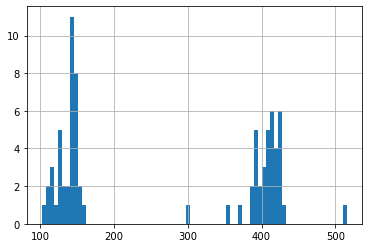

In [30]:
df['num_of_words'].hist(bins=len(df))

Text(0, 0.5, 'has_restaurants')

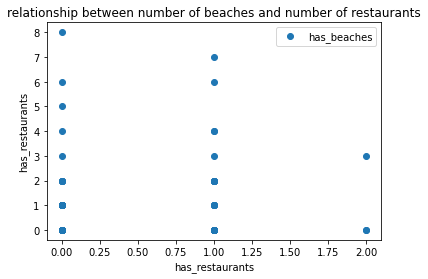

In [31]:
Y = df.plot(x = 'has_restaurants', y = 'has_beaches', style = 'o', title = 'relationship between number of beaches and number of restaurants')
Y.set_ylabel("has_restaurants")

Text(0, 0.5, 'has_beaches')

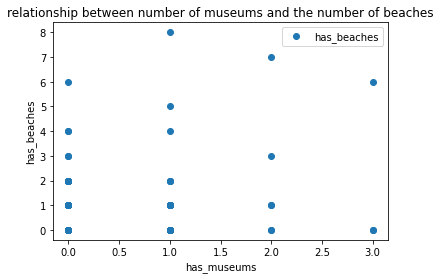

In [32]:
X = df.plot(x='has_museums', y='has_beaches', style='o',title="relationship between number of museums and the number of beaches")
X.set_ylabel("has_beaches")
